## SVM Tutorial

Support Vector Machines are a flexible nonparametric machine learning algorithm. In this
chapter you will discover how to implement the Support Vector Machine algorithm step-by-step
using sub-gradient descent. After completing this chapter you will know:

- How to use sub-gradient descent to update the coefficients for an SVM model.
- How to iterate the sub-gradient descent algorithm to learn an SVM model for training
data.
- How to make predictions given a learned SVM model.

### Tutorial dataset

A test problem was devised so that the classes are linearly separable. This means that a straight
line can be drawn to separate the classes. This is intentional so that we can explore how to
implement an SVM with a linear kernel (straight line). An assumption made by the SVM
algorithm is that first class value is -1 and the second class value is +1.

In [214]:
import pandas as pd
import numpy as np
from io import StringIO




In [215]:
dataset = StringIO("""X1 X2 Y
2.327868056 2.458016525 -1
3.032830419 3.170770366 -1
4.485465382 3.696728111 -1
3.684815246 3.846846973 -1
2.283558563 1.853215997 -1
7.807521179 3.290132136 1
6.132998136 2.140563087 1
7.514829366 2.107056961 1
5.502385039 1.404002608 1
7.432932365 4.236232628 1""")

In [216]:
df = pd.read_csv(dataset, sep=" ")
df.sample(5)

,X1,X2,Y
3,3.684815,3.846847,-1
9,7.432932,4.236233,1
5,7.807521,3.290132,1
0,2.327868,2.458017,-1
7,7.514829,2.107057,1


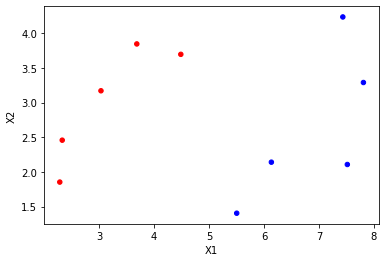

In [217]:
%matplotlib inline
import matplotlib.pyplot as plt

colors = {-1:'red', 1:'blue'}
df.plot(x = 'X1', y='X2', c= df.Y.map(colors), kind='scatter');


#### Form of Linear SVM model

The Linear SVM model is a line and the goal of the learning algorithm is to find values for the
coefficients that best separates the classes. The line is typically in the form:

    theta_0 + (theta_1 x X1) + (theta_2 X X2) = 0
    
Where theta_0, theta_1 and theta_2 are the coefficients and X1 and X2 are the input variables. This
will be the form of the equation that we will be using with one small modification, we will drop
the bias term (theta_0)

    dot(theta_i * Xi) = 0

### SVO Optimization Method

The optimization algorithm to find the coefficients can be stated as a quadratic programming
problem. This is a type of constraint optimization where fast solvers can be used. We will not
be using this approach in this tutorial. Another approach that can be used to discover the
coefficient values for Linear SVM is sub-gradient descent. In this method a random training
pattern is selected each iteration and used to update the coefficients.

After a large number of iterations (thousands or hundreds of thousands) the algorithm will settle on a stable set of
coefficients. The coefficient update equation works as follows. First an output value is calculated
as:

    output = Y * (theta_1 * X1) + (theta_2 * X2)
    
Two different update procedures are used depending on the output value. If the output
value is greater than 1 it suggests that the training pattern was not a support vector. This
means that the instance was not directly involved in calculating the output, in which case the
weights are slightly decreased:

    theta_i = (1 - 1/t) * theta
    
where theta is the weight that is being updated and t is the current iteration.
If the output is less than 1 then it is assumed that the training instance is a support vector and must be updated to better explain
the data.

    theta_i = (1 - 1/t) * theta + (1 / ( lambda * t)) * (y * x) 
    
    Note C = 1/ lambda
    
Where theta is the weight that is being updated, t is the current iteration and lambda is a
parameter to the learning algorithm. The lambda is a learning parameter and is often set to
very small values such as 0.0001 or smaller.

In [218]:
df

,X1,X2,Y
0,2.327868,2.458017,-1
1,3.032830,3.170770,-1
2,4.485465,3.696728,-1
3,3.684815,3.846847,-1
4,2.283559,1.853216,-1
5,7.807521,3.290132,1
6,6.132998,2.140563,1
7,7.514829,2.107057,1
8,5.502385,1.404003,1
9,7.432932,4.236233,1


In [219]:
X = df.iloc[0, :-1].to_list()
Y = df.iloc[0, -1]
theta = [0, 0]

In [220]:
from typing import List

Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def output(y:int, theta: Vector, point: Vector)-> float:
    """SVM calculate the output value"""
    return y * dot(theta, point)

In [221]:
assert output(-1, theta, X) == 0

In [222]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c """
    return [c * v_i for v_i in v]

def not_support_vec(i:int, theta: vector)-> float:
    """SVM parameter update if not 
    a support vector"""
    return scalar_multiply((1-1/i), theta)

In [223]:
def support_vec(i:int, theta: Vector, lam: float, y:int, point: Vector) -> float:
    """SVM parameter update if a support vector"""
    y_x = scalar_multiply(y, point)
    return [(1 - 1/i) * t_i + 1/(lam * i) * y_x_i for t_i, y_x_i in zip(theta, y_x)]
    

In [224]:
def coef_update(i:int, theta: Vector, point:Vector, lam:float, y:int) -> Vector:
    """SVM coefficients update"""
    out = output(Y, theta, point)
    if out < 1:
        return support_vec(i, theta, lam, y, point)
    else:
        return not_support_vec(i, theta)

In [225]:
def prediction_svm(theta: Vector, point: Vector):
    """SVM prediction based on coeficients"""
    return -1 if dot(theta, point) < 0 else 1

In [233]:
n = 160  # number of iterations
theta = [0, 0] # initilaize theta to 0

max_idx = len(df) - 1 # to prevent out of bounds df
idx = 0  # pandas idx

prediction = [] # for accuracy
for i in range(1,n):
    X = df.iloc[idx, :-1].to_list()
    Y = df.iloc[idx, -1]
    theta = coef_update(i, theta, X, 0.45, Y)
    if idx >= max_idx:
        idx = 0
    else:
        idx += 1
    pred = prediction_svm(theta, X)
    prediction.append((pred, Y))
theta

[0.5558659268623344, -0.7290904074493363]

In [234]:
# accurracy for the last 80 predictions is 100%
all(pred_i == y_i for pred_i,y_i in  prediction[-50:])

True

In [228]:
# does not work as per book when you randomize the (X, Y) input
n = 160
theta = [0, 0]

prediction = []
for i in range(1,n):
    X = df.sample().iloc[:, :-1].squeeze().to_list()
    Y = df.sample().iloc[:, -1].squeeze()
    theta = coef_update(i, theta, X, 0.5, Y)
    pred = prediction_svm(theta, X)
    prediction.append((pred, Y))    
    #print(theta)

theta

[0.10875912928301892, 0.054171637358490426]